# Rejection Sampling
(forked from https://www.deep-teaching.org/notebooks/monte-carlo-simulation/sampling/exercise-sampling-rejection)

Rejection sampling is a common algorithm for sampling from a distribution whose density can be evaluated only up to a normalization constant.
It supposes that we have access to a proposal distribution that can be sampled from and with known density.


### Importations
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import fmin

%matplotlib inline

## Example

We want to sample from the green distribution $p(x)$ below.

But for now we assume that we can't sample from $p(x)$ directly, but we can sample from the red one,$q(x)$, and we can compute $p(x)$ at each position $x$. 



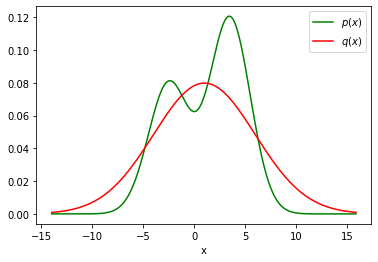

In [2]:
size=40
sigma_square_1 = 4.0
sigma_square_2 = 4.0
mu_1, sigma_1 = -2.5,np.sqrt(sigma_square_1)
mu_2, sigma_2 = 3.5,np.sqrt(sigma_square_1)
prob_1 = 0.4

rv_1 = norm(loc = mu_1, scale = sigma_1)
rv_2 = norm(loc = mu_2, scale = sigma_2)
x_ = np.arange(-14, 16, .1)

p_green = lambda x: prob_1 * rv_1.pdf(x) + (1-prob_1) * rv_2.pdf(x)
plt.plot(x_, p_green(x_) , "g-",label='$p(x)$')

sigma_red,mu_red = 5. , 1.
q_red = norm(loc = mu_red, scale = sigma_red)

plt.plot(x_, q_red.pdf(x_) , "r-",label='$q(x)$')
plt.legend()

_ = plt.xlabel("x")

## Task

We want to implement a rejection sampling method to get a sample from $p(x)$ by 
- sampling from $q(x)$ and rejecting or accepting some of the samples
- visualizing the sample.

#### Scaling factor 

We start by scaling the proposal function, such that the scale function wraps the target distribution density.

Optimization terminated successfully.
         Current function value: -1.747116
         Iterations: 18
         Function evaluations: 36


Text(0.5, 1.0, 'Target distribution, and scaled proposal density')

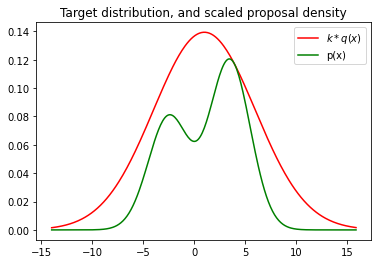

In [142]:
q_red.pdf(10)/p_green(10)


ratio_fun = lambda x: p_green(x) / q_red.pdf(x)

x_max=fmin(lambda x:- ratio_fun(x), 2) # Find argmax of the ratio function
k = (ratio_fun(x_max)) # define the scaling factor

def plot_green():
    plt.plot(x_, p_green(x_), label="p(x)", c='g')


plt.plot(x_, k * q_red.pdf(x_), label='$k*q(x)$', c='r')
plot_green()
plt.legend()
plt.title("Target distribution, and scaled proposal density")

#### Sampling
We generate samples by first sampling from $q$, and then accepting the samples with a probability $p(x)/kq(x)$.

In [143]:
def sample_px(n=1):
    y_accept=[]
    y_reject=[]
    x0 = q_red.rvs(n)
    u = np.random.rand(n)
    mask =k * q_red.pdf(x0)* u <= p_green(x0) 
    y_accept=x0[mask]
    y_reject=x0[~mask]

    return y_accept,y_reject
y_accept,y_reject = sample_px(100000)

#### Visualization of the results

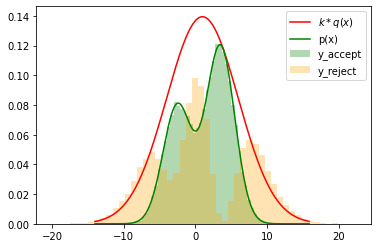

In [144]:
_=plt.hist(y_accept, density=True, bins=50, stacked=True,label='y_accept',color='g', alpha=0.3)
_=plt.hist(y_reject, density=True, bins=50, stacked=True, label='y_reject',color='orange', alpha=0.3)

plt.plot(x_, k * q_red.pdf(x_), label='$k*q(x)$', c='r')
plot_green()
plt.legend()
